# Part I - PISA Data Exploration
## by Miyuki Maxwell

## Introduction

*Introduction of the dataset*

>PISA is the OECD's Programme for International Student Assessment. PISA measures 15-year-olds’ ability to use their reading, mathematics and science knowledge and skills to meet real-life challenges. The data was collected from [PISA data source](https://www.oecd.org/pisa/)


*The columns are explained below:*

country: country of administration  
grade: student grade  
gender: gender   
teacher_wait: How often during test language lessons: The teacher waits long for students to quiet down.  
lesson_wait: How often during test language lessons: Students don't start working for a long time after the lesson begins.  
teacher_interest: How often during test language lessons: The teacher shows aninterest in every student's learning. 
teacher_helps: How often during test language lessons: The teacher helps students with their learning.  
teacher_listened: Thinking of past two test language lessons: The teacher listened to my view on how to do things. 
teacher_enjoys: Thinking of past two test language lessons: The teacher showed enjoyment in teaching.  
try_competing: Agree: I try harder when Im in competition with other people.  
math_challenged: How did you feel the last time you attended a mathematics class at school? Challenged  
math_nervous: How did you feel the last time you attended a mathematics class at school? Nervous or tense  
math_inspired: How did you feel the last time you attended a mathematics class at school? Motivated or inspired  
intelligence_fixed: Agree: Your intelligence is something about you that you can't change very much.  
trying_important: Thinking about your school: Trying hard at school is important.  
hardwork_satisfaction: I get satisfaction in trying hard
math_score: Plausible Value 1 in Mathematics  
reading_score: Plausible Value 1 in Reading  
science_score: Plausible Value 1 in Science  

## Preliminary Wrangling

In [36]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
#read the in the dataset 
df = pd.read_spss('CY07_MSU_STU_QQQ.sav')

In [4]:
#check the first 5 rows
print(df.shape)
df.head()

(612004, 1119)


,CNTRYID,CNT,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,OECD,ADMINMODE,...,PV4RTML,PV5RTML,PV6RTML,PV7RTML,PV8RTML,PV9RTML,PV10RTML,SENWT,VER_DAT,test
0,Albania,Albania,800002.0,800251.0,07MS,Albania,ALB - stratum 09: Rural / Center / Public,Albania,No,Computer,...,303.127,362.862,370.634,376.306,343.337,339.973,323.844,2.41652,09MAY19:11:20:53,NaN
1,Albania,Albania,800002.0,800402.0,07MS,Albania,ALB - stratum 09: Rural / Center / Public,Albania,No,Computer,...,412.093,410.709,437.901,430.188,403.804,457.625,391.290,2.41652,09MAY19:11:20:53,NaN
2,Albania,Albania,800002.0,801902.0,07MS,Albania,ALB - stratum 09: Rural / Center / Public,Albania,No,Computer,...,258.384,337.295,248.659,291.314,326.906,311.582,284.867,1.69989,09MAY19:11:20:53,NaN
3,Albania,Albania,800002.0,803546.0,07MS,Albania,ALB - stratum 09: Rural / Center / Public,Albania,No,Computer,...,422.430,452.831,452.842,441.359,463.541,440.298,447.464,2.41652,09MAY19:11:20:53,NaN
4,Albania,Albania,800002.0,804776.0,07MS,Albania,ALB - stratum 09: Rural / Center / Public,Albania,No,Computer,...,399.215,319.882,350.976,334.622,378.287,369.191,315.529,2.41652,09MAY19:11:20:53,NaN


In [149]:
#creating a subset of the full dataset
subset_df = df.loc[:,['CNT','ST001D01T','ST004D01T' ,'ST097Q03TA','ST097Q05TA','ST100Q01TA', 'ST100Q03TA','ST211Q02HA','ST213Q04HA','ST181Q04HA','WB166Q02HA','WB166Q03HA','WB166Q04HA','ST184Q01HA','ST036Q08TA','ST182Q03HA','PV1MATH','PV1READ','PV1SCIE']]

In [150]:
#renaming the columns to more meaningful column names
subset_df.rename(columns={"CNT":"country","ST001D01T":"grade", "ST004D01T":"gender", "ST097Q03TA":"teacher_wait","ST097Q05TA":"lesson_wait","ST100Q01TA":"teacher_interest", "ST100Q03TA":"teacher_helps","ST211Q02HA":"teacher_listened","ST213Q04HA":"teacher_enjoys","ST181Q04HA":"try_competing","WB166Q02HA":"math_challenged", "WB166Q03HA":"math_nervous","WB166Q04HA":"math_inspired","ST184Q01HA":"intelligence_fixed","ST036Q08TA":"trying_important","ST182Q03HA":"hardwork_satisfaction","PV1MATH":"math_score","PV1READ":"reading_score", "PV1SCIE":"science_score"},inplace=True)

In [151]:
#check the first 5 rows
subset_df.head()

,country,grade,gender,teacher_wait,lesson_wait,teacher_interest,teacher_helps,teacher_listened,teacher_enjoys,try_competing,math_challenged,math_nervous,math_inspired,intelligence_fixed,trying_important,hardwork_satisfaction,math_score,reading_score,science_score
0,Albania,Grade 10,Male,Never or hardly ever,Never or hardly ever,Every lesson,Every lesson,Strongly agree,Strongly agree,Agree,NaN,NaN,NaN,Strongly agree,Strongly agree,Strongly agree,490.187,375.984,445.039
1,Albania,Grade 10,Male,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Strongly agree,Strongly agree,Disagree,NaN,NaN,NaN,Strongly disagree,Strongly agree,Strongly disagree,462.464,434.352,421.731
2,Albania,Grade 10,Female,Never or hardly ever,Never or hardly ever,Every lesson,Every lesson,Strongly agree,Strongly agree,Agree,NaN,NaN,NaN,Agree,Strongly agree,Agree,406.949,359.191,392.223
3,Albania,Grade 10,Male,Every lesson,Most lessons,Every lesson,Every lesson,Strongly agree,Agree,Agree,NaN,NaN,NaN,Disagree,Strongly agree,Agree,482.501,425.131,515.942
4,Albania,Grade 10,Male,Never or hardly ever,Never or hardly ever,Every lesson,Every lesson,Agree,Strongly agree,Strongly agree,NaN,NaN,NaN,Strongly agree,Strongly agree,Agree,459.804,306.028,328.261


In [152]:
# high-level overview of data shape and composition
print(subset_df.shape)
print(subset_df.info())
print(subset_df.describe())

(612004, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612004 entries, 0 to 612003
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   country                612004 non-null  category
 1   grade                  612004 non-null  category
 2   gender                 612002 non-null  category
 3   teacher_wait           577013 non-null  category
 4   lesson_wait            577441 non-null  category
 5   teacher_interest       559231 non-null  category
 6   teacher_helps          556939 non-null  category
 7   teacher_listened       552405 non-null  category
 8   teacher_enjoys         550269 non-null  category
 9   try_competing          564849 non-null  category
 10  math_challenged        71146 non-null   category
 11  math_nervous           71142 non-null   category
 12  math_inspired          72380 non-null   category
 13  intelligence_fixed     555458 non-null  category
 14  trying_

In [153]:
#cleaning the grade columns to remove the uneccessary words(grade)
subset_df['grade'] = subset_df['grade'].str.replace("Grade ","")

In [156]:
#checking to see if grade should be an integer type variable
subset_df['grade'].unique()

array(['10', '9', '8', '11', '7', '12', 'Ungraded', 'Invalid', '13'],
      dtype=object)

In [157]:
#convert the categorical variables in ordered categorical types
ordinal_var_dict = {
    ('teacher_wait','lesson_wait','teacher_interest','teacher_helps'):['Every lesson','Most lessons','Some lessons','Never or hardly ever'],
    ('teacher_listened','teacher_enjoys','try_competing','intelligence_fixed','trying_important','hardwork_satisfaction'):['Strongly agree','Agree', 'Disagree', 'Strongly disagree'],
    ('math_challenged','math_nervous','math_inspired'):['Extremely','Quite a bit', 'A little','Not at all']
}

for columns in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=ordinal_var_dict[columns])
    subset_df[list(columns)] = subset_df[list(columns)].astype(ordered_var)

In [158]:
#check the changes
print(subset_df.info())
print(subset_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612004 entries, 0 to 612003
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   country                612004 non-null  category
 1   grade                  612004 non-null  object  
 2   gender                 612002 non-null  category
 3   teacher_wait           577013 non-null  category
 4   lesson_wait            577441 non-null  category
 5   teacher_interest       559231 non-null  category
 6   teacher_helps          556939 non-null  category
 7   teacher_listened       552405 non-null  category
 8   teacher_enjoys         550269 non-null  category
 9   try_competing          564849 non-null  category
 10  math_challenged        71146 non-null   category
 11  math_nervous           71142 non-null   category
 12  math_inspired          72380 non-null   category
 13  intelligence_fixed     555458 non-null  category
 14  trying_important    

### What is the structure of your dataset?

> Originally this was a huge dataset with a shape of 612004 rows and 1119 columns.
I created a subset of the dataframe called subset_df. 
Most of the columns are categorical and ordinal. 
There are three types of scores that are numeric, these are the maths scores, reading scores and scienc scores.

### What is/are the main feature(s) of interest in your dataset?

>1. How does the mindset of the students in terms of learning change by gender?  
>2. How do the feelings about maths affect their scores?  
>3. How do attitudes towards learning change by country?  
 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think that certain countries emphasize different subjects being more important than others, possibly maths is a higher importance in Asian countries and therefore may have higher scores compared to European countries. Growing up in different environments will also affect the students outlook on learning.  I wonder if there is more emphasis for the importance of learning in different countries and attitudes may be different. 


## Univariate Exploration



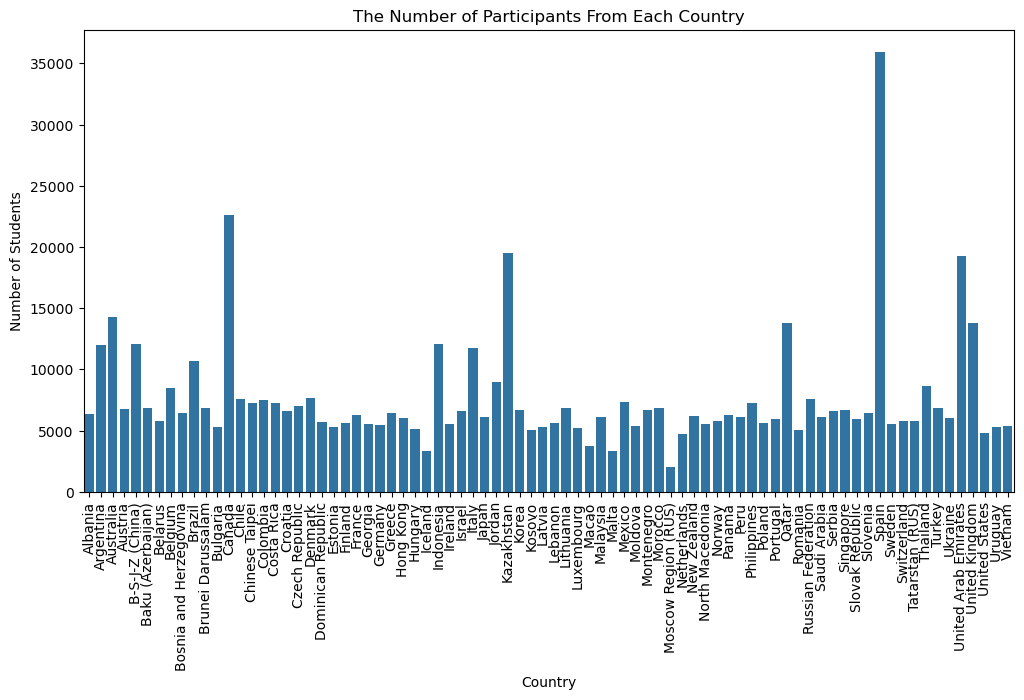

In [159]:
#country and the number of participants
plt.figure(figsize = [12, 6])
default_color = sns.color_palette()[0]

sns.countplot(data = subset_df, x = 'country', color = default_color)
plt.xticks(rotation=90);
plt.title('The Number of Participants From Each Country')
plt.xlabel('Country')
plt.ylabel('Number of Students');

Most of the countries have about 6000 responses, however, there are a few outliers such as Spain, Canada, Kazakhstan and United Arab Emirates.


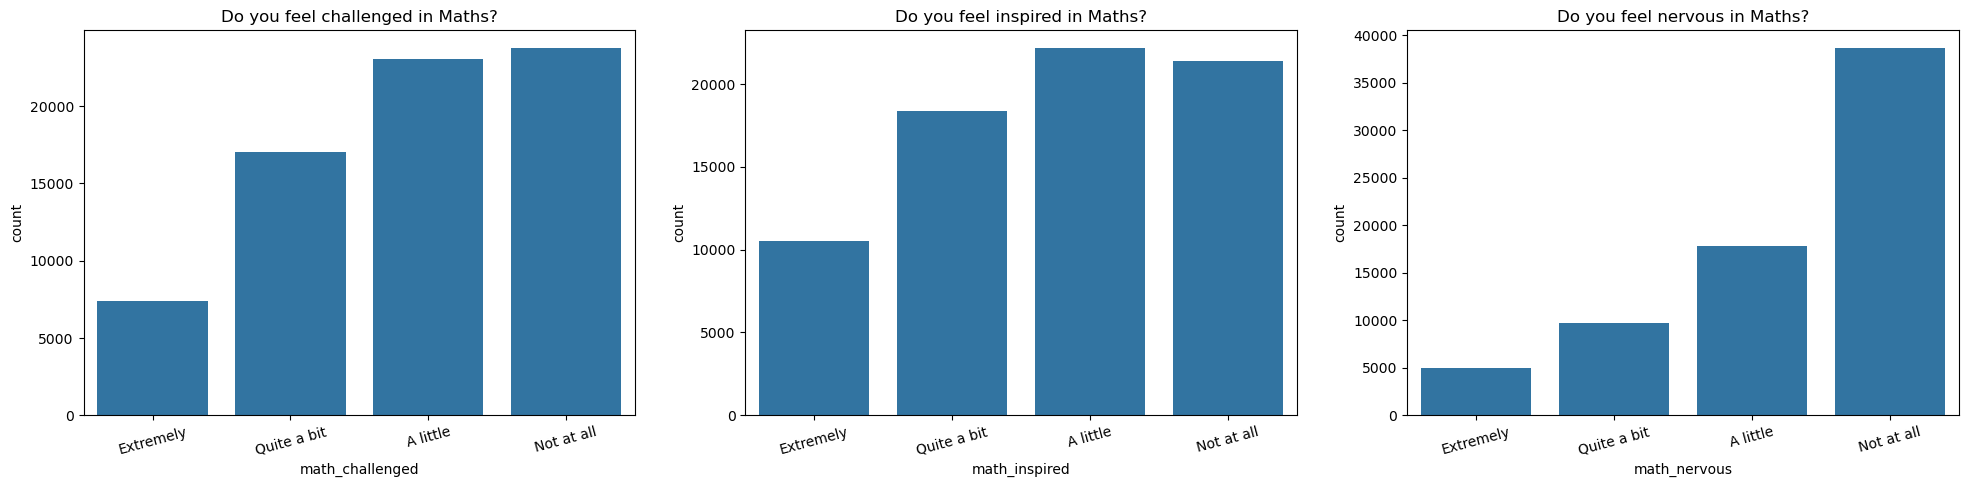

In [160]:
#observing feelings about maths through three countplots
plt.figure(figsize = [10, 5])

plt.subplot(1,3,1)
sns.countplot(data = subset_df, x = 'math_challenged', color = default_color)
plt.xticks(rotation=15)
plt.title('Do you feel challenged in Maths?')

plt.subplot(1,3,2)
sns.countplot(data = subset_df, x = 'math_inspired', color = default_color)
plt.xticks(rotation=15)
plt.title('Do you feel inspired in Maths?');

plt.subplot(1,3,3)
sns.countplot(data = subset_df, x = 'math_nervous', color = default_color)
plt.xticks(rotation=15)
plt.title('Do you feel nervous in Maths?');

plt.subplots_adjust(right=2)

There are many students that don't feel very challenged or inspired in Maths class. There are some students that feel extremely nervous in maths class. It would be interesting to see this as a percentage. 

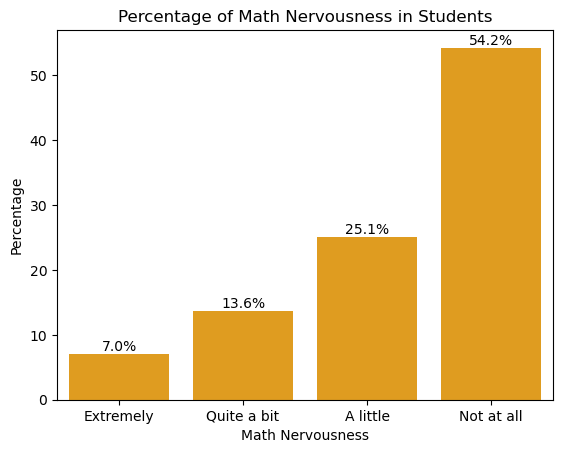

In [161]:
#Normalising the math_nervous column and converting series to a df
nervous_count = subset_df['math_nervous'].value_counts(normalize=True, sort=False)
nervous_df = nervous_count.reset_index()
nervous_df['percentage'] = nervous_df['proportion'] * 100  # Multiply by 100 for percentage

# Create the bar plot
sns.barplot(data=nervous_df, y='percentage', x='math_nervous', color='orange')

# Add text annotations to the bars
for i, percent in enumerate(nervous_df['percentage']):
    plt.text(i, percent, f'{percent:.1f}%', ha='center', va='bottom')

plt.xlabel('Math Nervousness')
plt.ylabel('Percentage')
plt.title('Percentage of Math Nervousness in Students')
plt.show()


It is worrying to see that 7% of the students taking this test are extremely nervous about math class. Around 46% of students are nervous about math class(extremely+quite a bit), which is a staggering amount. 

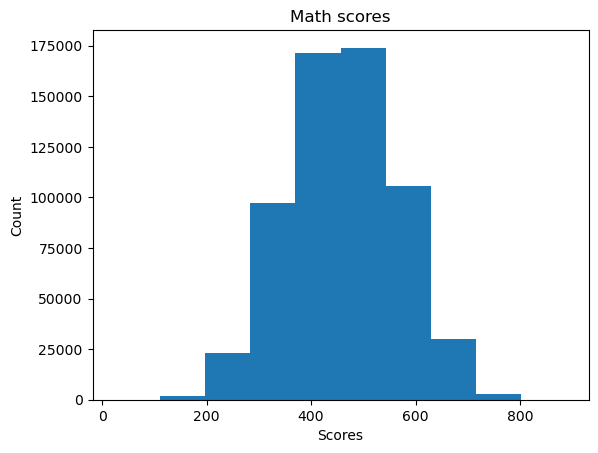

In [162]:
#plot a histogram of the plausible values of math scores 
plt.hist(data=subset_df, x='math_score');
plt.title('Math scores')
plt.xlabel('Scores')
plt.ylabel('Count');

The average math score is around 500 

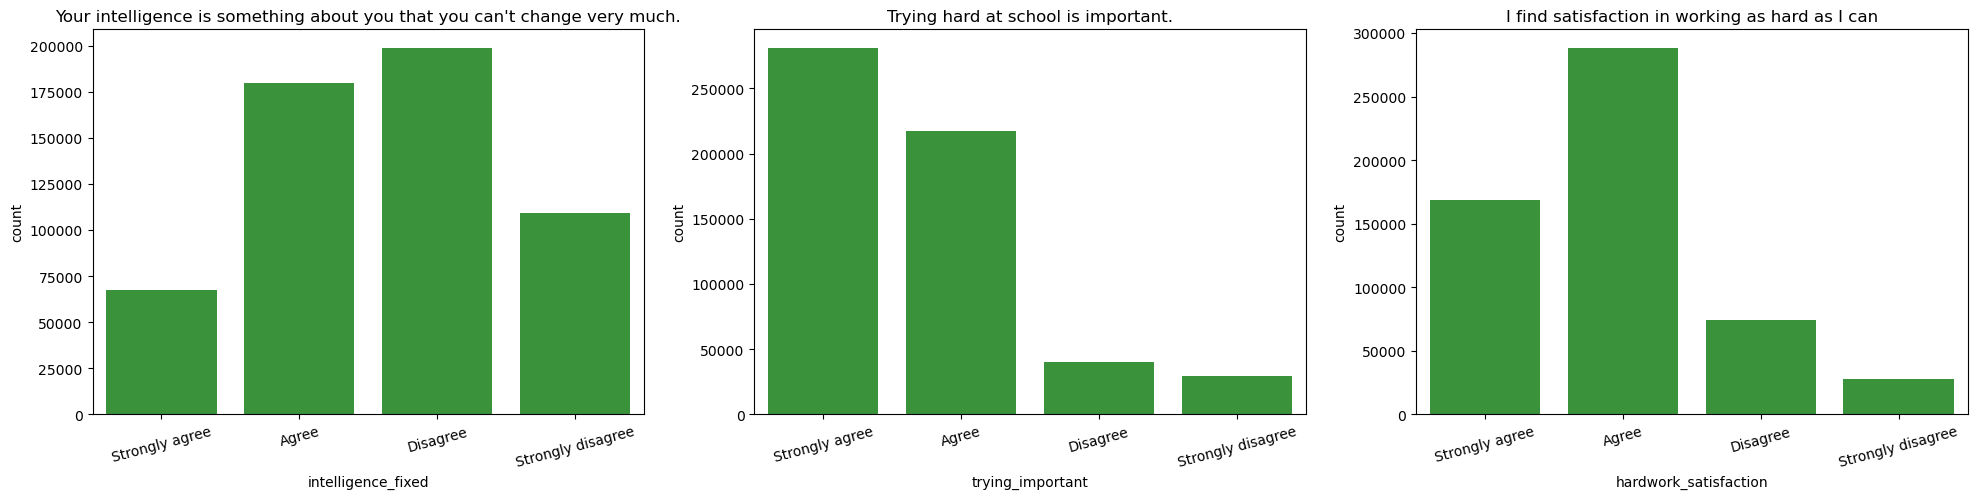

In [163]:
#observing feelings about learning with 3 count plots  

plt.figure(figsize = [10, 5])

plt.subplot(1,3,1)
sns.countplot(data = subset_df, x = 'intelligence_fixed', color = 'tab:green')
plt.xticks(rotation=15)
plt.title('Your intelligence is something about you that you can\'t change very much.')

plt.subplot(1,3,2)
sns.countplot(data = subset_df, x = 'trying_important', color = 'tab:green')
plt.xticks(rotation=15)
plt.title('Trying hard at school is important.');

plt.subplot(1,3,3)
sns.countplot(data = subset_df, x = 'hardwork_satisfaction', color = 'tab:green')
plt.xticks(rotation=15)
plt.title('I find satisfaction in working as hard as I can');

plt.subplots_adjust(right=2)

It looks like a little less than half of the participants think that you are born with intelligence. 
Most students think that it is important to try at school and also get satisfaction from working hard. I want to look into this further with multivariate plots to see how these throughts change with country.


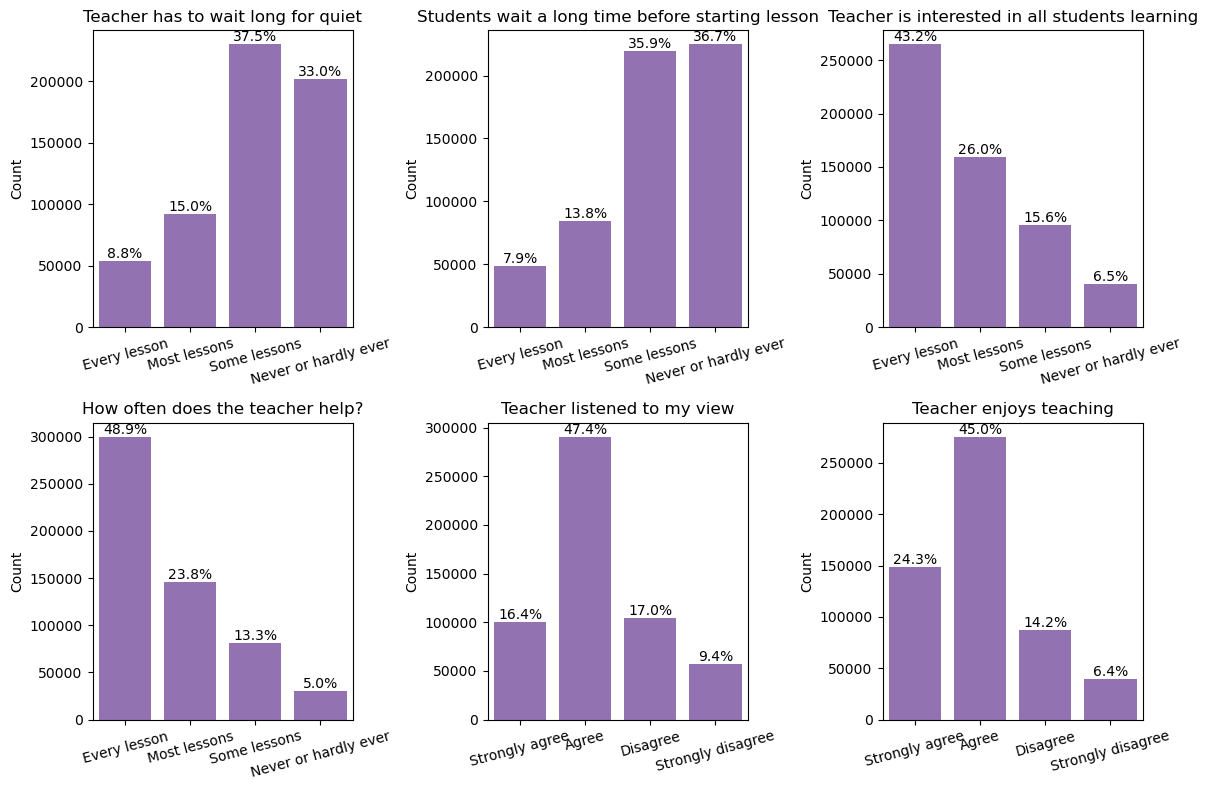

In [164]:
#create titles for each of the plots associated with teachers i
columns_for_countplots = [
    {'teacher_wait': 'Teacher has to wait long for quiet'},
    {'lesson_wait': 'Students wait a long time before starting lesson'},
    {'teacher_interest': 'Teacher is interested in all students learning'},
    {'teacher_helps': 'How often does the teacher help?'},
    {'teacher_listened': 'Teacher listened to my view'},
    {'teacher_enjoys': 'Teacher enjoys teaching'}
]

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Flatten the axes for iteration
axes = axes.flatten()

# Iterate through columns and create countplots
for i, column_dict in enumerate(columns_for_countplots):
    column_name, description = list(column_dict.items())[0]  # Extract column name and description
    sns.countplot(data=subset_df, x=column_name, ax=axes[i], color='tab:purple')
    axes[i].set_title(f'{description}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', labelrotation=15)  # Rotate x-axis labels by 15 degrees
    
# Add text annotations to the bars
    total_count = len(subset_df[column_name])
    counts = subset_df[column_name].value_counts(sort=False)
    for j, count in enumerate(counts):
        percentage = count/ total_count *100
        axes[i].text(j, count, f'{percentage:.1f}%', ha='center', va='bottom')
   
    

# Adjust layout and spacing
plt.tight_layout()
plt.show()

Most of the trends shown in each of these graphs are positive. They show that the majority of lessons, the teachers don't need to wait for a long time for students to be quiet and that the teachers help and listen to the students and enjoy teaching.
These are positive results in terms of the students learning environment.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>There were a few outliers with the number of students who took the test in certain countries, however, this will not affect the analysis therefore I will leave them all in. I also do not want to decrease the sample size as the greater the sample size, the more representative of the population the analysis will be. 


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> During the tidying process, I removed many of the columns as many were not of use for this particular analysis. I also cleaned the columns grade to remove the word ‘grade’ out of the columns as this is unnecessary. 
>
>It is interesting to see the students feelings about maths and that there are many that don’t feel inspired or challenged. Some even feel extremely nervous in maths class (7%) which was I higher percentage than expected. 

## Bivariate Exploration


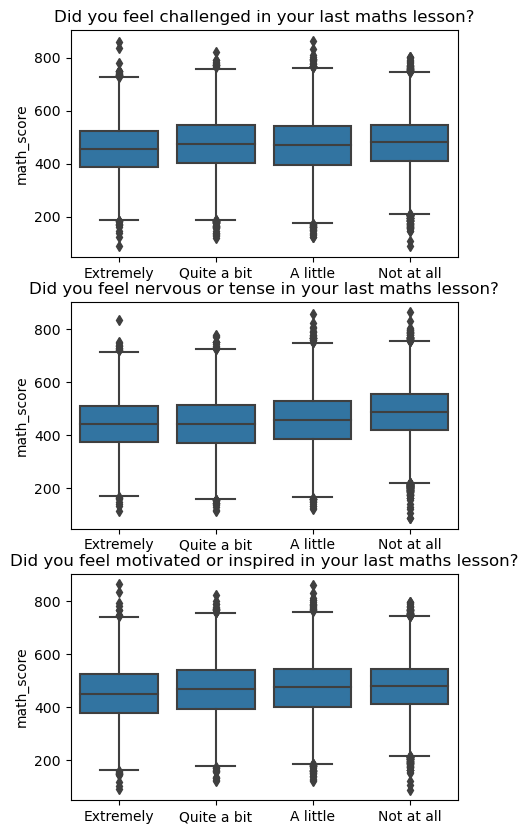

In [165]:
#create three boxplots in rows
fig, ax = plt.subplots(nrows=3, figsize = [5,10])

default_color = sns.color_palette()[0]
b1 = sns.boxplot(data=subset_df, x='math_challenged', y='math_score', color = default_color, ax = ax[0])
b1.title.set_text('Did you feel challenged in your last maths lesson?')
b2 = sns.boxplot(data=subset_df, x = 'math_nervous', y='math_score', color = default_color, ax = ax[1])
b2.title.set_text('Did you feel nervous or tense in your last maths lesson?')
b3 = sns.boxplot(data=subset_df, x = 'math_inspired', y='math_score', color = default_color, ax = ax[2])
b3.title.set_text('Did you feel motivated or inspired in your last maths lesson?')
for axis in ax:
    axis.set(xlabel=None)
plt.show()


These box plots are interesting in that the median math scores are quite similar with students feelings about math.The median maths socre for the students that felt extremely challenged is slightly lower than the students who felt quite a bit challenged, a little challenged and not at all challenged. This could be explained by the fact that students who are exremely challened might not understand the concepts and be negatively effected by the high level of maths in their lessons, whereas, students who are quite a bit challenged, may enjoy the challenge of maths and this may be the optimum challenge level for those students. There is a slight increase in math score as the students feel less nervous in maths which is expected. These students will have more confidence in maths and therefore get higher scores. The third plot shows that extremely motivated inspired students have a slightly lower median in their math score which was not expected. However, this data only shows their feelings about their last math lesson and this may not be their feelings about maths in general.   


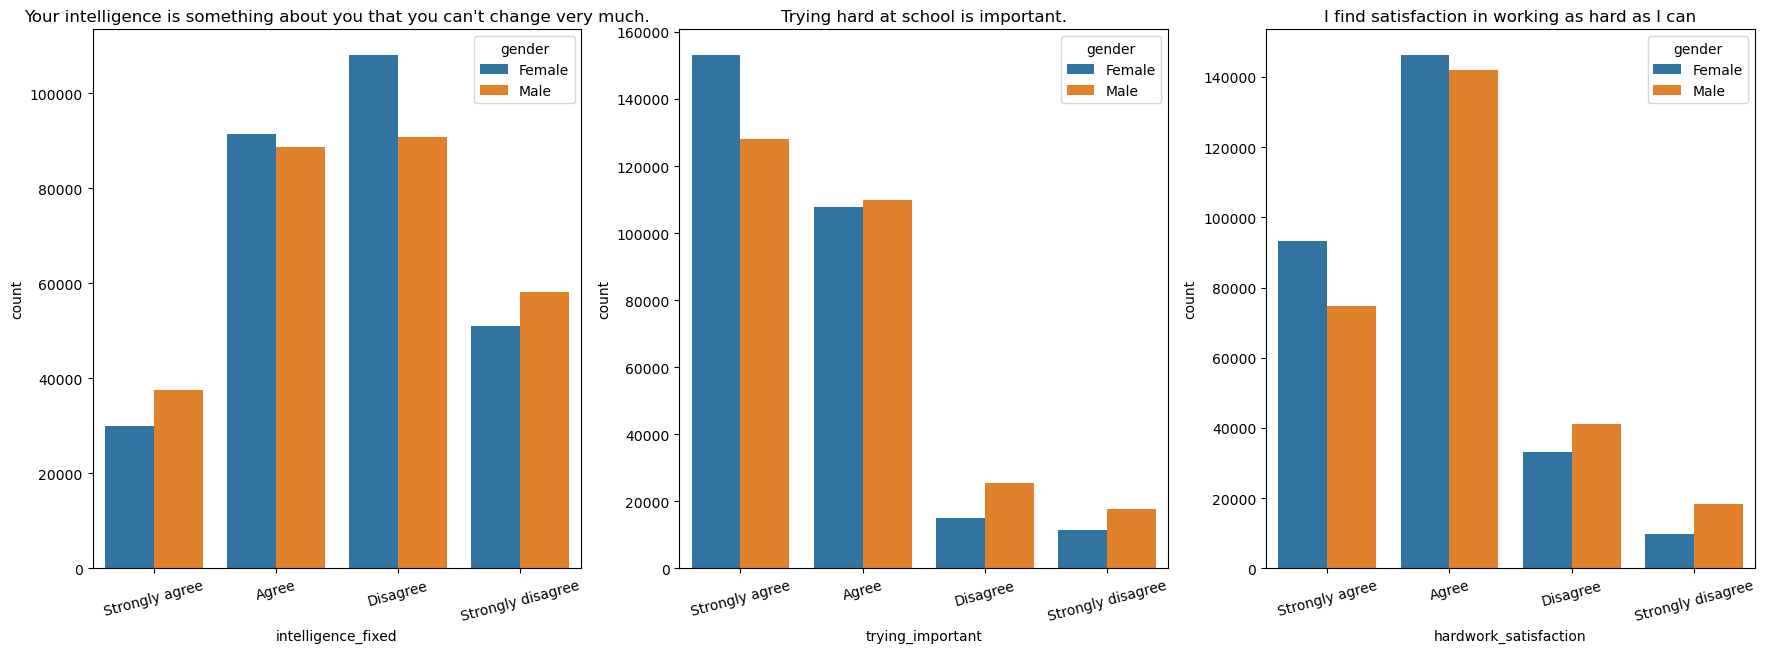

In [166]:
#create 3 stacked bar charts separating out the gender
plt.figure(figsize = [19, 7])

plt.subplot(1,3,1)
sns.countplot(data = subset_df, x = 'intelligence_fixed', hue='gender')
plt.xticks(rotation=15)
plt.title('Your intelligence is something about you that you can\'t change very much.')

plt.subplot(1,3,2)
sns.countplot(data = subset_df, x = 'trying_important', hue='gender')
plt.xticks(rotation=15)
plt.title('Trying hard at school is important.');

plt.subplot(1,3,3)
sns.countplot(data = subset_df, x = 'hardwork_satisfaction', hue='gender')
plt.xticks(rotation=15)
plt.title('I find satisfaction in working as hard as I can');

plt.subplots_adjust(right=1)



Out of the students that strongly agree with intelligence being something that you can’t change very much, more of them are male students, however, there are also more males who strongly disagree with intelligence being fixed. There are more females choosing the options agree and disagree. It seems the males compared to females choose the more extreme answers in this case and females choose less extreme answers(just agree/disagree; not strongly).

Interestingly more males compared to females think that trying is not important. Although a lot of the students agree that it is important, out of the students that disagree, there are more males than females. 

In the last graph, we can see that may of the students agree that they find satisfaction in working as hard as they can. Of the students that disagree there are more males than females and vice versa for those who agree and strongly agree. 

I also want to normalise on gender to see out of the total females  and total males, what percentage of them strongly agree/ agree / disagree /strongly disagree with each of these questions. 

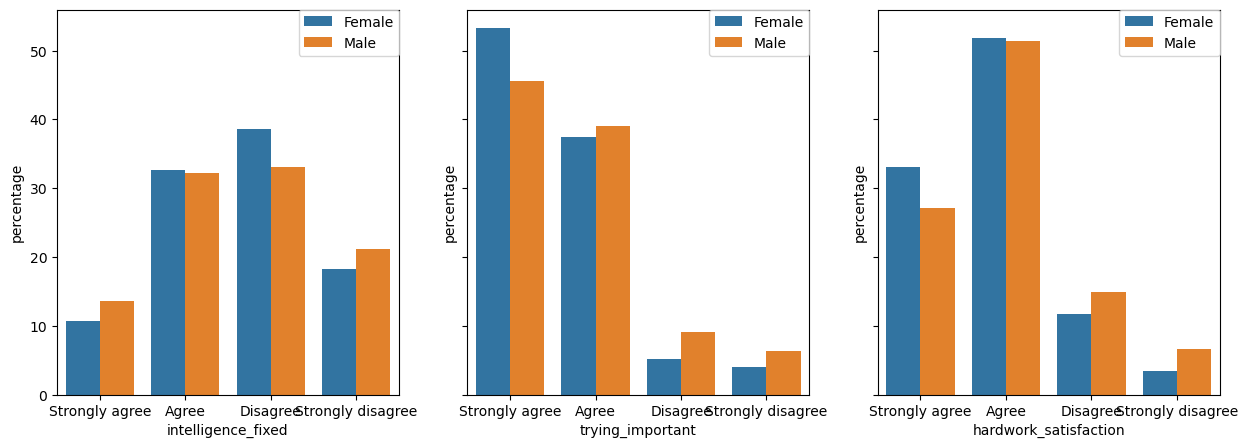

In [167]:
#make a function to normalise by gender
def normalising_by_gender(x):
    normalised_counts = subset_df.groupby([x, 'gender']).size().unstack().apply(lambda x: x / x.sum(), axis=0)
    normaldf = (normalised_counts * 100).reset_index()
    normaldf = normaldf.melt(id_vars=[x], var_name='gender', value_name='percentage').sort_values(x)
    plot = sns.barplot(data=normaldf, x=x, y='percentage', hue='gender')
    plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=0.)
    

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
plt.subplot(1,3,1)
normalising_by_gender('intelligence_fixed')
plt.subplot(1,3,2)
normalising_by_gender('trying_important')
plt.subplot(1,3,3)
normalising_by_gender('hardwork_satisfaction')

After nomalising by gender, it looks like the percentages of each of the answers for the males and females are quite similar and follow similar trends for all three ideas. These graphs do not change much when comparing to the graohs above (that have not been normalised). 
About 7-8% more females strongly agree that trying is important compared to males and there are also more females that strongly agree that they get satisfaction from hard work. Compared to females, more males disagree with the statement that they get satisfaction out of trying hard and same with trying hard being important. A similar percentage of the students either agree or disagree with intelligence being fixed(~30-40% for both groups). More students agree that trying is important and get satisfaction out of trying hard compared to those who disagree. 

I wonder if these feelings change by country

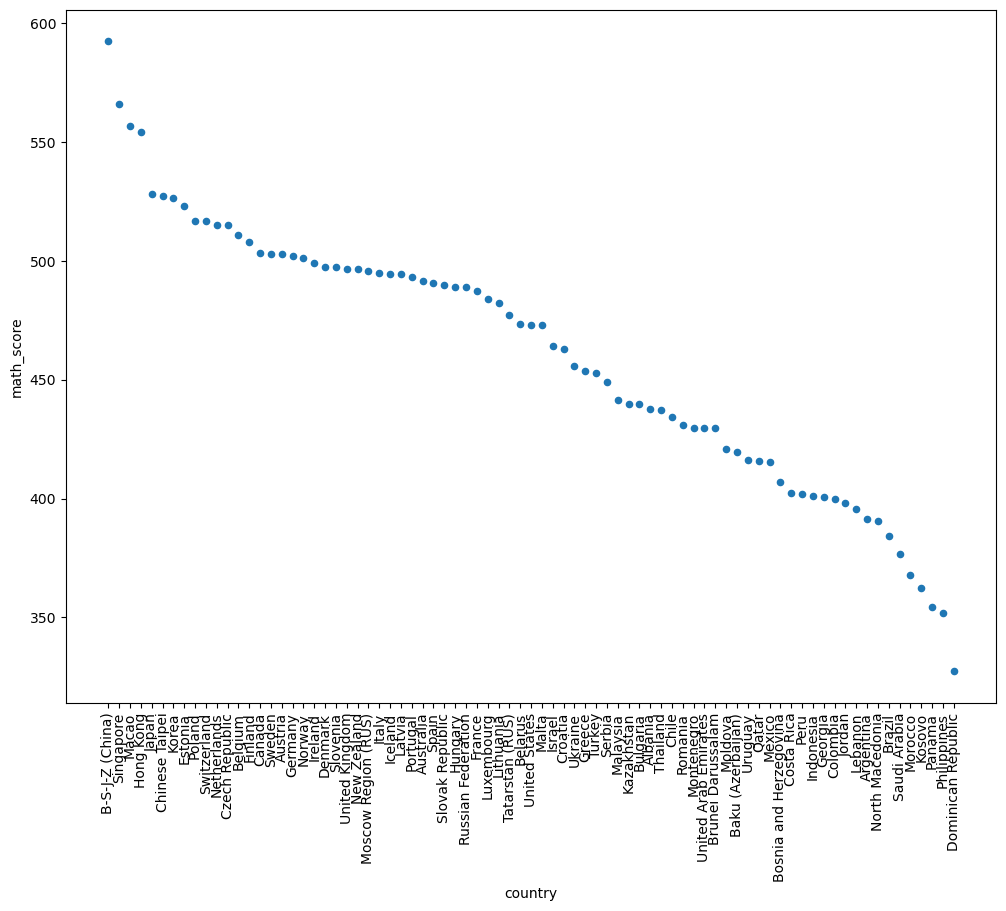

In [168]:
#plot a graph of the mean math score by country
average_math = subset_df[['country','math_score']].groupby('country').mean().reset_index().sort_values(by='math_score', ascending=False)
average_math.dropna(inplace=True)
average_math.plot(x='country', y='math_score', kind='scatter', figsize=(12,9))
plt.xticks(rotation=90);

It is interesting to see the specific countries and the maths results with the highest being china and lowest being Dominican Republic

In [169]:
#assigning the numerical test scores to numeric_vars
numeric_vars = ['math_score', 'science_score','reading_score']

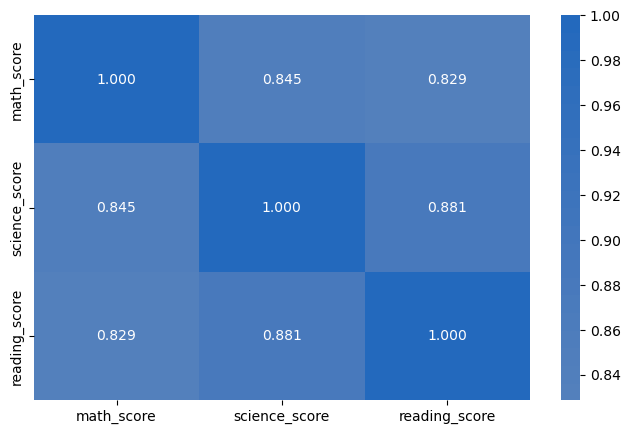

In [170]:
# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(subset_df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

All three scores are highly correlated with each other.

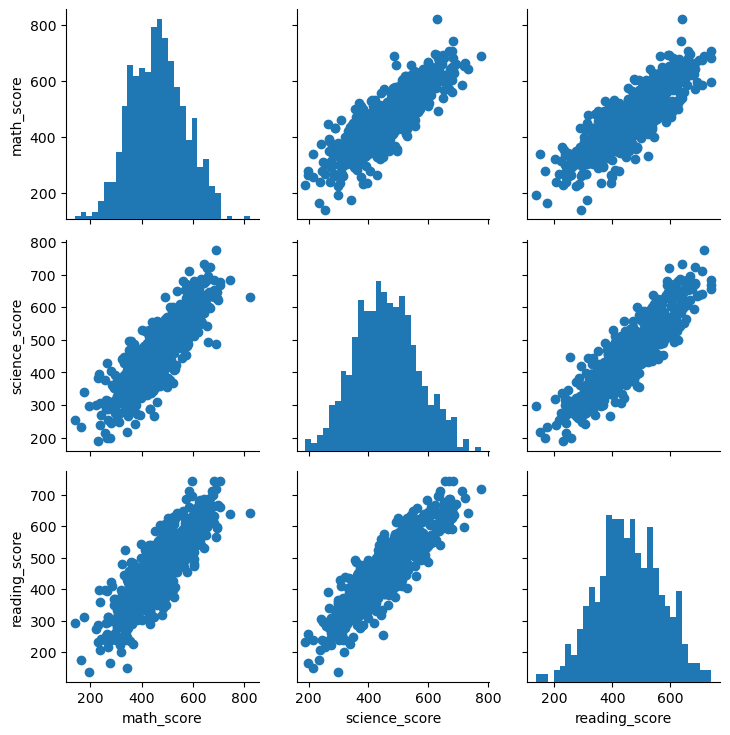

In [171]:
#creating a sample of the data and plotting a matrix of the numerical variables

sample_data = subset_df.sample(n=600, replace=False)
g = sns.PairGrid(data = sample_data, vars=numeric_vars)
g= g.map_diag(plt.hist, bins = 30)
g.map_offdiag(plt.scatter);

The above scatter plots of samples show positive linear relationships between the scores in each of the subjects. 
The above histograms all look like normal distributions. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>  There is definitely a positive linear relationship between the maths, science and reading scores. This shows that generally if a student is better at maths or science of reading, they will be better at the other subjects as well. This may be due to their attitude towards learning a they may enjoy it more, get more satisfaction out of trying hard and think that trying is important. This is something I want to explore further. 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Some interesting relationships were shown when looking at the maths box plots. It showed that maths scores went down when the students felt extremely challenged in their last maths lesson. Also the maths scores were greater when they did not feel nervous or tense in their last maths lesson and additionally, when looking at students who felt extremely motivated or inspired in their last maths lesson, the median maths score was slightly lower than the students who chose ‘quite a bit’ , ‘a little’ and ‘not at all’.

>When looking at the gender differences, the plots showed that the ideas for males and females were quite similar and showed the same shape for both genders. Most students agree that trying hard is important and they get satisfaction out of working hard. Interestingly a similar percentage of students agree and disagree with the idea that intelligence is something that you can’t change very much. More males compared to females think that trying is not important. Although a lot of the students agree that it is important, out of the students that disagree, there are more males than females. This is the same as getting satisfaction from hard work, out of the students who don't get satisfaction out of hard work, there are more males than females. 

>The top three countries that have the best math scores are China, Singapore and Macao, the countries with the lowest math scores are Panama, Philippines and Dominican Republic. 

## Multivariate Exploration



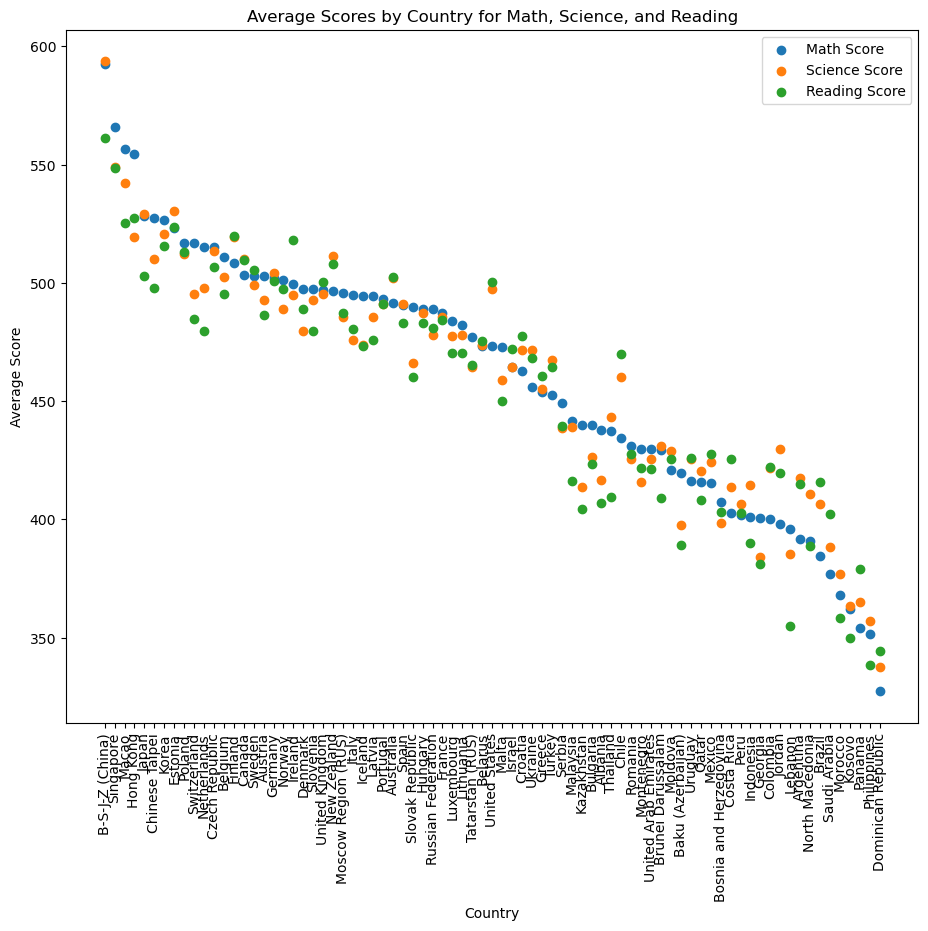

In [184]:
# Merge the three dataframes on 'country' (average_math was defined in a graph above)
merged_df = average_math.merge(average_science, on='country').merge(average_reading, on='country')

# Plot the scores on the same plot
plt.figure(figsize=(11, 9))

plt.scatter(merged_df['country'], merged_df['math_score'], label='Math Score')
plt.scatter(merged_df['country'], merged_df['science_score'], label='Science Score')
plt.scatter(merged_df['country'], merged_df['reading_score'], label='Reading Score')

plt.xticks(rotation=90)
plt.legend()
plt.xlabel('Country')
plt.ylabel('Average Score')

plt.title('Average Scores by Country for Math, Science, and Reading')

plt.show()


The reading and science scores show a similar trend to the maths scores. Countries that score higher in maths, tend to score higher in science and reading also. There is a lot of scatter(of reading and science scores) about the maths scores, however, in general, it shows that the countries that score high in one subject will score high in the others also. I want to choose specific countries of interest to compare.

/var/folders/bf/8hwtltl131d75c0rdkmwhfhr0000gp/T/ipykernel_12004/2642777517.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_country_df['country'] = pd.Categorical(select_country_df['country'], categories=select_country, ordered=True)
/Users/miyuki/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


                                  test_score
country            test_type                
Australia          math_score       492.9650
                   science_score    505.0500
                   reading_score    506.8350
Dominican Republic math_score       325.0955
                   science_score    331.0360
                   reading_score    337.1100
United Kingdom     math_score       498.5535
                   science_score    496.5145
                   reading_score    502.4280
Japan              math_score       532.1820
                   science_score    533.9810
                   reading_score    506.9040
New Zealand        math_score       498.4440
                   science_score    516.3750
                   reading_score    513.6750
B-S-J-Z (China)    math_score       598.0210
                   science_score    599.1000
                   reading_score    566.9605


/Users/miyuki/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


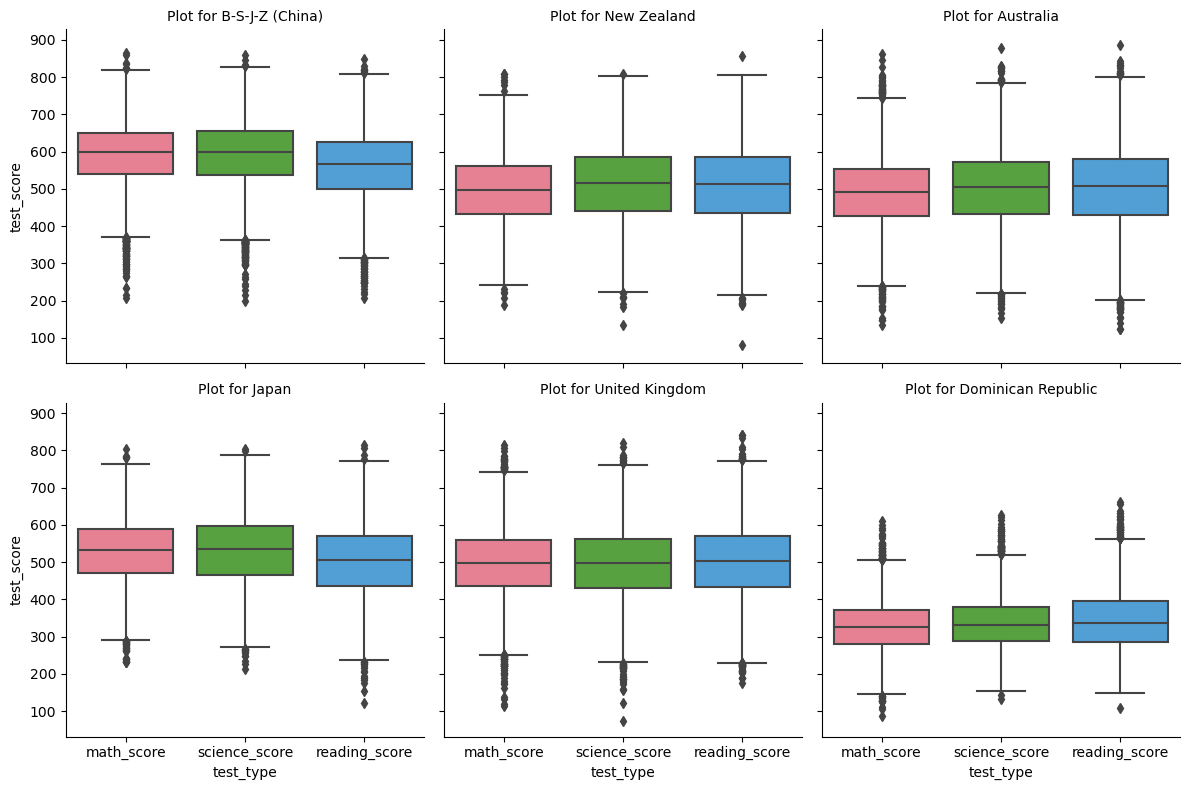

In [183]:
#make a facet grid of specific countries of interest and their maths scores
select_country = ['B-S-J-Z (China)', 'New Zealand', 'Australia', 'Japan', 'United Kingdom', 'Dominican Republic']
select_country_df = subset_df[subset_df['country'].isin(select_country)]
select_country_df['country'] = pd.Categorical(select_country_df['country'], categories=select_country, ordered=True)
subset_select_country_df = select_country_df[['country','math_score','science_score','reading_score']]
select_country_melt = subset_select_country_df.melt(id_vars=['country'],var_name='test_type', value_name='test_score')
g = sns.FacetGrid(data=select_country_melt, col='country', col_wrap=3, height=4)
g.map(sns.boxplot, 'test_type', 'test_score', palette='husl')
sum_stats = select_country_melt.groupby(by=['country','test_type'], sort=False).median()
print(sum_stats)
# Show the plot
g.set_titles('Plot for {col_name}')
plt.show()

I have chosen to look into 6 countries of interest. I have chosen China and Dominca Republic as these are the highest scoring and the lowest scoring respectively. I have taught in New Zealand, Australia, Japan and the United Kingdom and am interested to see how these countries compare to each other and to the highest and lowest scoring countries. NZ, Australia, UK and Dominican Republic all have lower maths scores compared to science and reading. Whereas in the Asian countries, the Science and Maths scores are visibly higher than the reading score. 

/Users/miyuki/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/miyuki/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


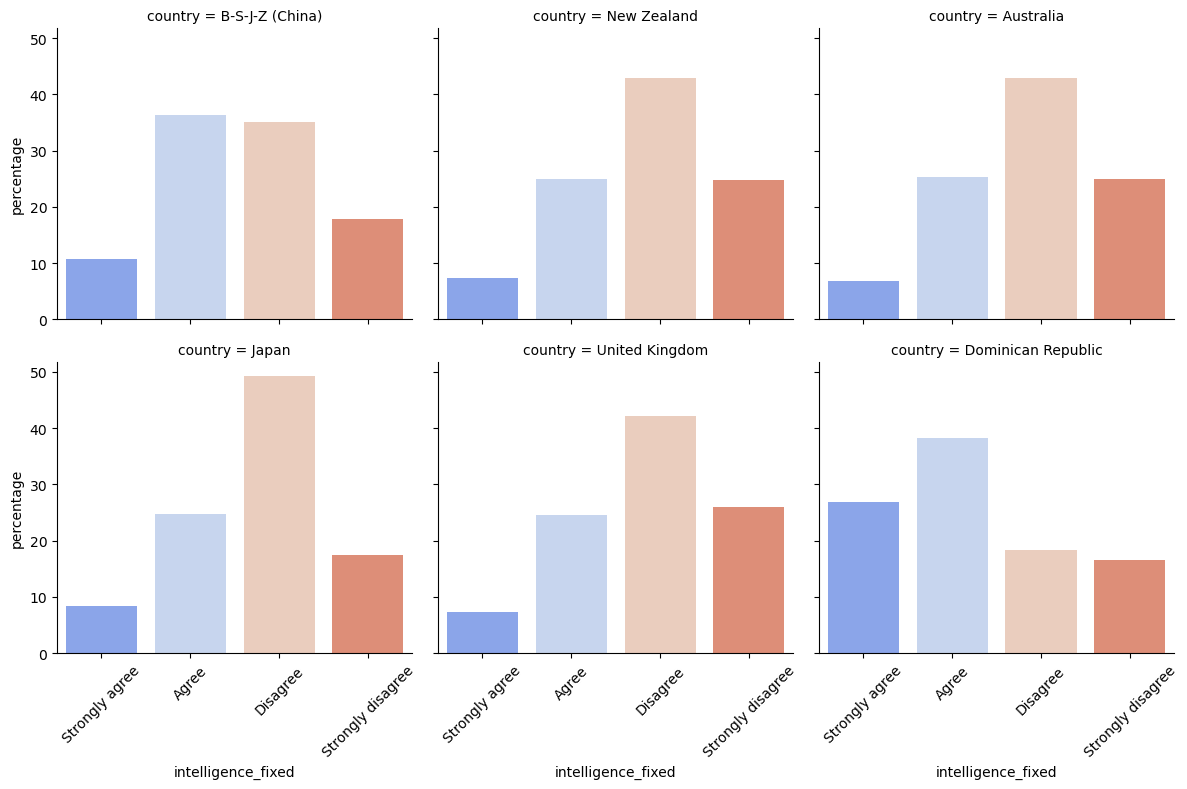

In [185]:
#looking at the percentages of each viewpoint for each country on whether intellogence is fixed or not
normalised_intelligence = select_country_df.groupby(by=['country','intelligence_fixed']).size().unstack().apply(lambda x: x / x.sum(), axis=1)
normal_df = (normalised_intelligence * 100).reset_index()
country_intellig_melt = normal_df.melt(id_vars=['country'],var_name='intelligence_fixed', value_name='percentage').sort_values('country')


# Convert 'intelligence_fixed' column to categorical type with the specified order
intelligence_order = ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree']
country_intellig_melt['intelligence_fixed'] = pd.Categorical(country_intellig_melt['intelligence_fixed'], categories=intelligence_order, ordered=True)
country_intellig_melt.sort_values(['country', 'intelligence_fixed'], inplace=True)


#creating barplots for each country and whether they think intelligence is fixed or able to be changed
g = sns.FacetGrid(data=country_intellig_melt, col='country', col_wrap=3, height=4)

# Rotate labels function
def rotate_labels(*args, **kwargs):
    plt.xticks(rotation=45)

# Use the order parameter in barplot to set the category order explicitly
g.map(sns.barplot, 'intelligence_fixed', 'percentage', order=intelligence_order, palette='coolwarm')
g.map(rotate_labels)

plt.show()

Interestingly New Zealand, Australia and United Kingdom all have similar viewpoints about 40% students disagreeing with the statement that intelligence is something you can't really change. About 25% for these countries strongly disagree and 25% agree. Less than 10% strongly agree. Japan students have similar views but there are about 50% that disagree (about 10% more than NZ, Oz and UK) and a few less that strongly disagree. 
A few more students in China have a fixed mindset where they agree that intelligence is something you can't change very much with around 35% agreeing. However, around 35% also disagree.
In Dominican Republic, around 65% either agree or strongly agree. This is an interesting contrast to the other countries.

I want to see whether thier mindsets affects their math score.

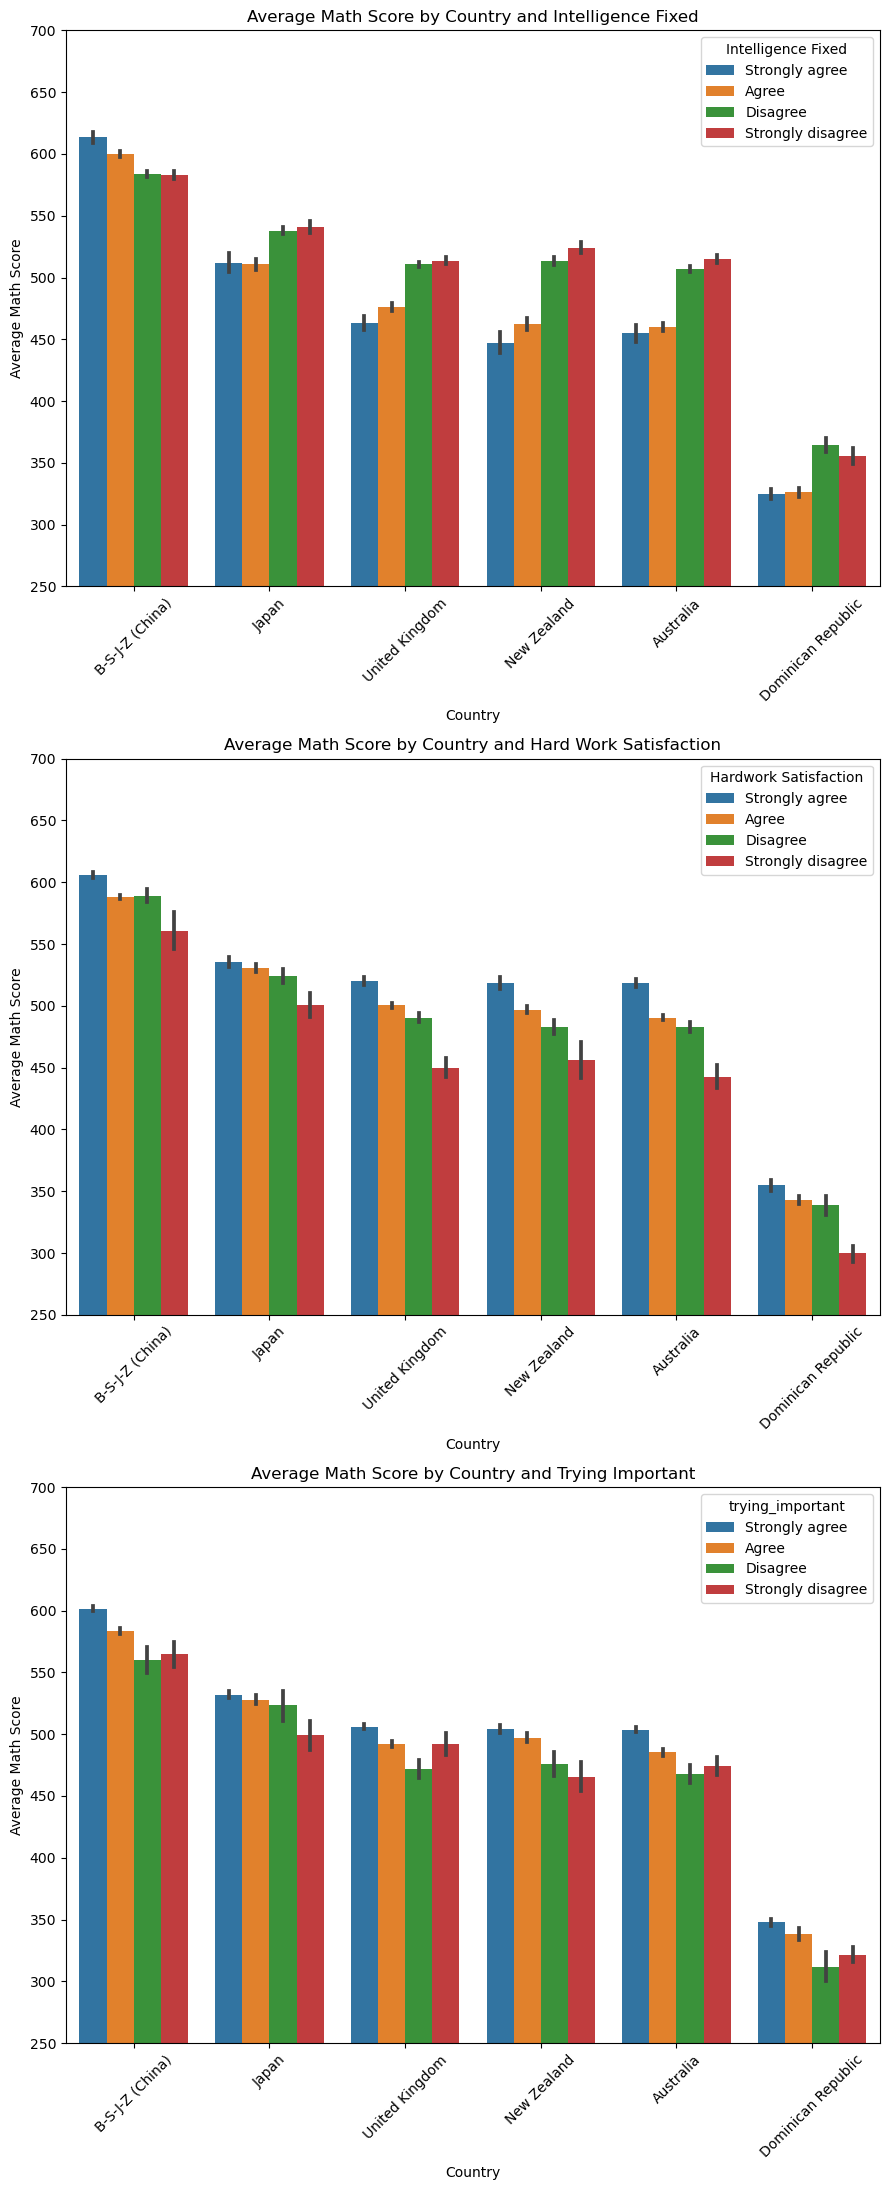

In [182]:
# Create a bar plot for average math scores grouped by 'country' and 'intelligence_fixed', 
#'hardwork_satisfaction' and 'trying_important'
avg_math_score = select_country_df.groupby(['country', 'intelligence_fixed'])['math_score'].mean().reset_index()
ordered_countries = avg_math_score.groupby('country')['math_score'].mean().sort_values(ascending=False).index

plt.figure(figsize=(9, 22))
plt.subplot(3,1,1)
ax1 = sns.barplot(data=select_country_df, x='country', y='math_score', hue='intelligence_fixed', order=ordered_countries)
plt.xticks(rotation=45)
plt.legend(title='Intelligence Fixed')
plt.title('Average Math Score by Country and Intelligence Fixed')
plt.xlabel('Country')
plt.ylabel('Average Math Score')
ax1.set_ylim(250,700)

plt.subplot(3,1,2)
ax2 = sns.barplot(data=select_country_df, x='country', y='math_score', hue='hardwork_satisfaction', order=ordered_countries)
plt.xticks(rotation=45)
plt.legend(title='Hardwork Satisfaction')
plt.title('Average Math Score by Country and Hard Work Satisfaction')
plt.xlabel('Country')
plt.ylabel('Average Math Score')
ax2.set_ylim(250,700)

plt.subplot(3,1,3)
ax3 =sns.barplot(data=select_country_df, x='country', y='math_score', hue='trying_important',  order=ordered_countries)
plt.xticks(rotation=45)
plt.legend(title='trying_important')
plt.title('Average Math Score by Country and Trying Important')
plt.xlabel('Country')
plt.ylabel('Average Math Score')
ax3.set_ylim(250,700)

plt.tight_layout()
plt.show()

When comparing the average maths scores for each the select countries and the answers given for whether intelligence is something that you can’t change very much; in China, the students who strongly agree have higher scores than those who strongly disagree. This is different to those from Japan, United Kingdom, New Zealand, Australia and Dominican Republic. The students from these countries who strongly agree with the statement that intelligence is something you can’t change very much, get lower on average scores compared to those who think that intelligence is something you can change. 

The next graph shows that in general the average the math score for those who get satisfaction from trying hard is higher than those who don’t. This would be expected as the ones that don’t try hard will not get great results as they don’t enjoy trying hard. 

The last graph shows that the students who agree with ‘trying hard at school is important’, generally get higher scores on average in all of the select countries. Interstingly in the UK, the students who strongly disagree that trying is important, have a similar average to those who agree that trying is important. There is a similar shape with China, Australia and Dominican Republic, where the average math scores go down from strongly agree, agree, and disagree, then the average score increases slightly from the previous 'disagree' option. 
In Japan the students who strongly agree, agree and disagree that trying is important on average seem to get similar maths scores, showing that even students who don't think trying is important will score well. However, there is a drop in the mean score for students who strongly disagree. 
In New Zealand, the results of the maths tests and their opinions on whether trying is important is what I would have expected of all of the countries as the more important they think trying is, the better the the average score. 

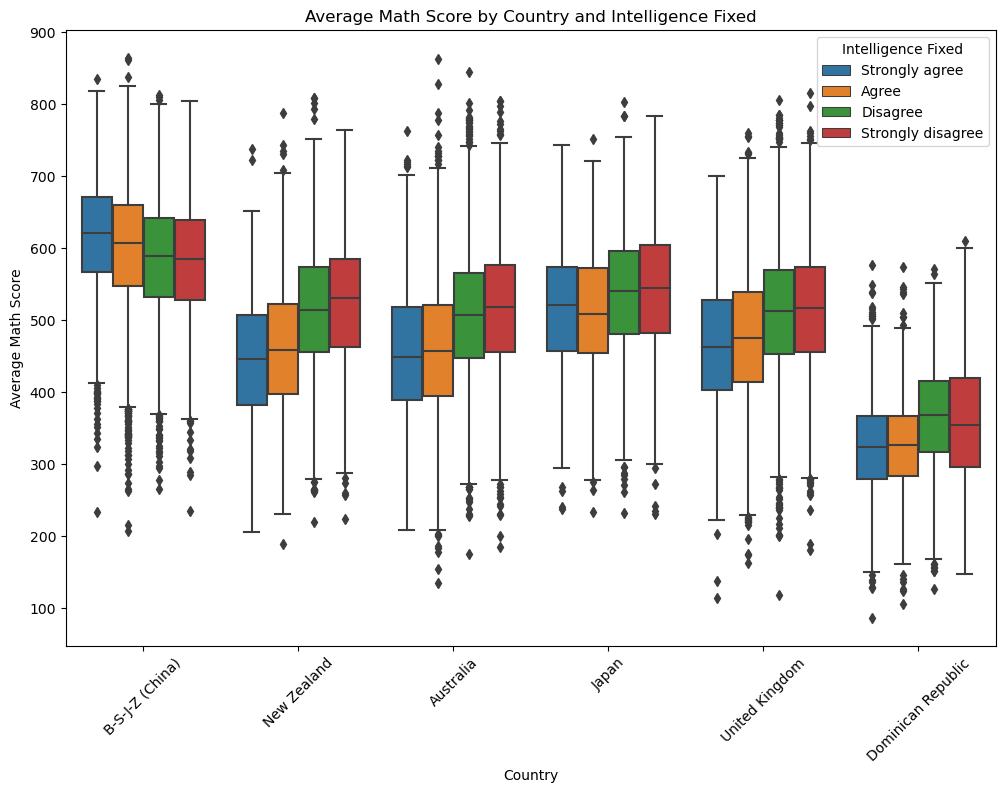

In [176]:
#create a box plot with the select countries and the average maths score | intelligence fixed response
plt.figure(figsize=(12, 8))
sns.boxplot(data=select_country_df, x='country', y='math_score', hue='intelligence_fixed')
plt.xticks(rotation=45)
plt.legend(title='Intelligence Fixed')
plt.title('Average Math Score by Country and Intelligence Fixed')
plt.xlabel('Country')
plt.ylabel('Average Math Score')
plt.show()

This box plot visualises the amount of variance there is in the maths scores and the ranges for each of the categories.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The analysis shows that generally countries that score higher in one subject will score high in the other two subjects. 


### Were there any interesting or surprising interactions between features?

>I found that New Zealand, Australia, and the UK have similar trends in both scores and mindset. Interestingly in China, students who strongly agree with the statement 'intelligence is somehting you can't change very much' actually had higher scores than those who strongly disagree. This was an interesting insight as in the western countries and Japan, we saw the opposite. 

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.
>1. How does the mindset of the students in terms of learning change by gender?  
 When looking at the gender differences, the plots showed that the ideas for males and females were quite similar and showed the same shape for both genders. Most students agree that trying hard is important and they get satisfaction out of working hard. More males compared to females think that trying is not important. Although a lot of the students agree that it is important, out of the students that disagree, there are more males than females. This is the same as getting satisfaction from hard work, out of the students who don't get satisfaction out of hard work, there are more males than females. Out of the students that strongly agree with intelligence being something that you can’t change very much, more of them are male students, however, there are also more males who strongly disagree with intelligence being fixed. There are more females choosing the options agree and disagree. It seems the males compared to females choose the more extreme answers in this case and females choose less extreme answers(just agree/disagree; not strongly).
>2. How do the feelings about maths affect their scores?  
 The median math scores are quite similar with students feelings about math.The median maths score for the students that felt extremely challenged is slightly lower than the students who felt quite a bit challenged, a little challenged and not at all challenged. This could be explained by the fact that students who are extremely challenged might not understand the concepts and be negatively effected by the high level of maths in their lessons, whereas, students who are quite a bit challenged, may enjoy the challenge of maths and this may be the optimum challenge level for those students. There is a slight increase in math score as the students feel less nervous in maths which is expected. These students will have more confidence in maths and therefore get higher scores. The third plot shows that extremely motivated inspired students have a slightly lower median in their math score which was not expected. However, this data only shows their feelings about their last math lesson and this may not be their feelings about maths in general.   
>3. How do attitudes towards learning change by country?  
When comparing China, Dominican Republic, New Zealand, Australia, Japan and the United Kingdom, the attitudes and ideas are different. The analysis showed that China had the best scoring maths, reading and science scores, however, the students that strongly agree that intelligence is something you can’t change scored higher than the other students. This was an interesting insight and shows us a little about what common societal ideas are in China. Instead in NZ, Japan, Australia and the UK, the students that on average strongly disagreed, got better maths scores which is what I would have expected in the results for all countries. In Dominican Republic, the students that chose ‘disagree’ scored highest in their maths tests. 
The students who agree with ‘trying hard at school is important’, generally get higher scores on average in all of the select countries. This is to be expected as students who try hard and think it’s important should get better scores. Interstingly in the UK, the students who strongly disagree that trying is important, have a similar average to those who agree that trying is important.This could show that students who strongly disagree may find school easy and that even though they don't think it's important they can cruise through(this would need to be backed with further analysis). There is a similar shape with China, Australia and Dominican Republic, where the average math scores go down from strongly agree, agree, and disagree, then the average score increases slightly from the previous 'disagree' option. 
In New Zealand and Japane, the results of the maths tests and their opinions on whether trying is important is what I would have expected of all of the countries as the more important they think trying is, the better the the average score. 
In general the average the math score for those who get satisfaction from trying hard is higher than those who don’t. This would be expected as the ones that don’t try hard will not get great results as they don’t enjoy trying hard. 


>The steps taken in this analyis started with looking at countplots and general exploration of the trends and ideas that students had towards leanring. Next when looking at bivariate plots showed us some more insight into how the students felt in maths class and the differences between male and female ideas and thoughts towards learning. The mulitvariate plots allowed deeper exploration into how the preconceptions and attitudes towards learning affected the scores in the tests for specified countries. I can say that a student in Japan, NZ, Austrlia or the UK will get a higher score if they disagree with the statement that intelligence is something you can't change much. This is beacuse the confidence intervals do not overlap with those that agree or strongly agree with this statement.